
Topicos:
1. Usando findContours (Encontrando Contornos)
2. Desenhando Contornos
3. Hierarquia dos Contornos
4. Modos de Contorno (Simples vs Aproximado)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Contornos são linhas ou curvas contínuas que delimitam ou cobrem completamente a fronteira de um objeto.

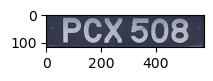

In [2]:

image = cv2.imread('images/LP.jpg')
imshow(image)

#### **Aplicando cv2.findContours()**

```cv2.findContours(imagem, Modo de Recuperação, Método de Aproximação)```

**Modos de Recuperação**
- **RETR_LIST** - Recupera todos os contornos, mas não cria nenhuma relação pai-filho. Pais e filhos são iguais sob essa regra, e eles são apenas contornos. Ou seja, todos eles pertencem ao mesmo nível hierárquico.
- **RETR_EXTERNAL** - Retorna apenas os contornos externos extremos. Todos os contornos internos são deixados para trás.
- **RETR_CCOMP** - Essa sinalização recupera todos os contornos e os organiza em uma hierarquia de 2 níveis. Ou seja, os contornos externos do objeto (ou seja, sua fronteira) são colocados na hierarquia-1. E os contornos dos buracos dentro do objeto (se houver) são colocados na hierarquia-2. Se houver algum objeto dentro dele, seu contorno é colocado novamente apenas na hierarquia-1. E seu buraco na hierarquia-2 e assim por diante.
- **RETR_TREE** - Recupera todos os contornos e cria uma lista de hierarquia completa da família.

**Opções de Método de Aproximação**
- cv2.CHAIN_APPROX_NONE - Armazena todos os pontos ao longo da linha (ineficiente!)
- cv2.CHAIN_APPROX_SIMPLE - Armazena apenas os pontos finais de cada linha




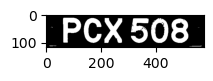

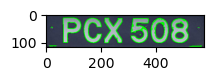

38


In [3]:

# Converte a escala cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

# Encontrando Contornos
# Use uma cópia da sua imagem, por exemplo, edged.copy(), já que o findContours altera a imagem
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Desenhe todos os contornos, observe que isso sobrescreve a imagem de entrada (operação inplace)
# Use '-1' como o terceiro parâmetro para desenhar todos
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))


#### **Podemos usar as Bordas Canny em vez de Limiarização**

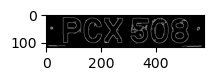

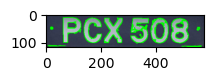

77


In [4]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)
imshow(edged)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))


# **Modos**

Documento Oficial - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierarquia**

Este array armazena 4 valores para cada contorno:
- O primeiro termo é o índice do próximo contorno
- O segundo termo é o índice do contorno anterior
- O terceiro termo é o índice do contorno pai
- O quarto termo é o índice do contorno filho

### **RETR_LIST**
Recupera todos os contornos, mas não cria nenhuma relação pai-filho. Pais e filhos são iguais sob essa regra, e eles são apenas contornos. Ou seja, todos eles pertencem ao mesmo nível hierárquico.

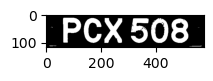

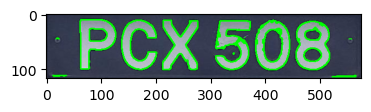

38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [-1 36 -1 -1]]]


In [5]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image, 20)

print(len(contours))
print(hierarchy)

### **RETR_EXTERNAL**

Retorna apenas as flags externas extremas.

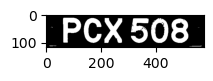

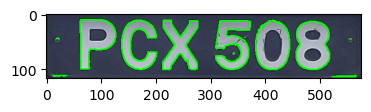

16
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 -1 -1]]]


In [6]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image, size = 20)

print(len(contours))
print(hierarchy)

### **RETR_CCOMP**

Recupera todos os contornos e os organiza em uma hierarquia de 2 níveis. Ou seja, os contornos externos do objeto (ou seja, sua fronteira) são colocados na hierarquia-1. E os contornos dos buracos dentro do objeto (se houver) são colocados na hierarquia-2. Se houver algum objeto dentro dele, seu contorno é colocado novamente apenas na hierarquia-1. E seu buraco na hierarquia-2 e assim por diante.

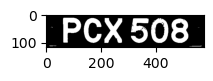

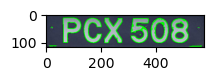

38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [7]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))
print(hierarchy)

### **RETR_TREE**

Recupera todos os contornos e cria uma lista hierárquica completa da família.

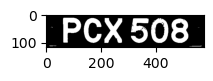

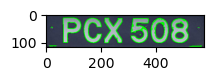

38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [8]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))
print(hierarchy)

## **Método de Aproximação**

#### **CHAIN_APPROX_NONE**

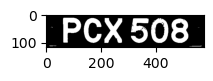

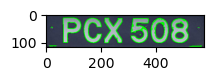

38
87
50
7
1
1
1
1
4
2
1
236
80
6
75
10
4
8
426
6
4
4
10
14
21
17
241
6
14
15
155
14
9
358
4
4
347
272
92


In [9]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

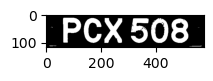

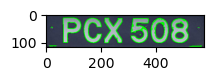

38
8
10
7
1
1
1
1
4
2
1
114
40
6
37
6
4
8
172
6
4
4
6
6
15
11
121
6
6
8
57
8
7
170
4
4
164
65
27


In [10]:
image = cv2.imread('images/LP.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))
for c in contours:
  print(len(c))